In [1]:
import numpy as np

x_data = np.random.randn(4)

def makeTdata():

    t_data = np.array(
        [np.random.uniform(0.0,0.2),
        np.random.uniform(0.8,1.0),
        np.random.uniform(0.0,0.2),
        np.random.uniform(0.8,1.0)]
        )
    for _ in range(99):
        t_data = np.row_stack([t_data,np.array(
            [np.random.uniform(0.0,0.2),
            np.random.uniform(0.8,1.0),
            np.random.uniform(0.0,0.2),
            np.random.uniform(0.8,1.0)]
            )])
    print(t_data.shape)
    return t_data

In [2]:
import torch

class myDecoder(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torch.nn.Sequential(
            torch.nn.Linear(2,3), #2로 받는게 더 다양하게 나올 것 같은데
            torch.nn.Sigmoid(),
            torch.nn.Linear(3,4),
            torch.nn.Sigmoid(),
        )
    def forward(self,x):
        return self.model(x)

class myDiscriminator(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = torch.nn.Sequential(
            torch.nn.Linear(4,3),
            torch.nn.Sigmoid(),
            torch.nn.Linear(3,1),
            torch.nn.Sigmoid()
        )
    def forward(self,x):
        return self.model(x)


In [3]:
from torch.optim import Adam,SGD
from torch.nn import BCELoss


decoder = myDecoder()
discriminator = myDiscriminator()

optim_de = Adam(decoder.parameters(),lr=0.01)
optim_discrim = Adam(discriminator.parameters(),lr=0.01)

loss_fn = BCELoss()

x_data = np.random.randn(100,2)
real_data = makeTdata()

x_data = torch.tensor(x_data,dtype=torch.float32)
real_data = torch.tensor(real_data,dtype=torch.float32)
#fake_data = decoder(x_data)
# label은 long아니라 float겠네

num_epoch=2000

decoder_loss_hist =[]
discriminator_loss_hist =[]
fake_data_hist=[]
fake_pred_hist=[]
draw_num=1

(100, 4)


In [4]:
# decoder로 fake
## fake와 real 구분하는 학습
### 10회 진행되면 fake 모델 학습
# 반복

## fake와 real 구분
## discrimintor에 real은 label 1로 fake는 label 0으로
## 그럼 label 데이터 따로 만들어야 함

### fake 모델 학습
### input에 대해 decoder와 discriminator까지 조지고, discriminator의 label 1로 decoder만학습

In [5]:
def train():
    global x_data, real_data, decoder,discrimintor, optim_de,optim_discrim, loss_fn, num_epoch,fake_data_hist,fake_pred_hist,\
        draw_num,decoder_loss_hist,discriminator_loss_hist
    for epoch in range(1,num_epoch+1):
        fake_data = decoder(x_data)
        if (epoch//5)%2==0:
            optim_discrim.zero_grad()
            real_pred = discriminator(real_data)
            real_label= torch.ones_like(real_pred,dtype=torch.float32)
            fake_pred = discriminator(fake_data)
            fake_label = torch.zeros_like(fake_pred,dtype=torch.float32)
            loss = loss_fn(real_pred,real_label)
            loss += loss_fn(fake_pred,fake_label)
            loss.backward()
            optim_discrim.step()

            discriminator_loss_hist.append(loss.item())
        else:
            optim_de.zero_grad()
            fake_pred = discriminator(fake_data)
            fake_label = torch.ones_like(fake_pred,dtype=torch.float32)
            loss = loss_fn(fake_pred,fake_label)
            loss.backward()
            optim_de.step()            
        
            decoder_loss_hist.append(loss.item())

        if epoch%(num_epoch//10)==0:
            print(f"epoch {epoch},loss {loss.item():.2f}")
            
            fake_data_hist.append(fake_data[0:draw_num].detach().numpy())
            fake_pred_hist.append(fake_pred[0].flatten().detach().numpy())
            


In [6]:
train()

epoch 200,loss 1.39
epoch 400,loss 1.44
epoch 600,loss 1.54
epoch 800,loss 1.47
epoch 1000,loss 1.40
epoch 1200,loss 1.39
epoch 1400,loss 1.39
epoch 1600,loss 1.39
epoch 1800,loss 1.39
epoch 2000,loss 1.39


In [7]:
import matplotlib.pyplot as plt

def visualize_decoder(draw_num):
    global fake_data_hist
    plt.figure(figsize=(16,4))
    cm = plt.cm.rainbow(np.linspace(0.,1.,draw_num))
    for i in range(0,10,1):
        data = fake_data_hist[i]
        for j in range(draw_num):
            color = cm[j][:3]
            plt.scatter(np.array([draw_num*i+1,draw_num*i+1,draw_num*i+1,draw_num*i+1]),data[j],s=20,c=color)



In [8]:
def visualize_loss():
    global decoder_loss_hist,discriminator_loss_hist
    fig,axs = plt.subplots(1,2,figsize=(8,4))
    axs[0].plot(np.arange(1,len(decoder_loss_hist)+1),decoder_loss_hist)
    axs[0].set_title('decoder loss')
    axs[1].plot(np.arange(1,len(discriminator_loss_hist)+1),discriminator_loss_hist)
    axs[1].set_title('discriminator loss')
    

In [9]:
def visualize_discriminator():
    global fake_pred_hist
    plt.figure(figsize=(4,4))
    plt.plot(np.arange(1,len(fake_pred_hist)+1),fake_pred_hist)
    plt.title("discriminator")


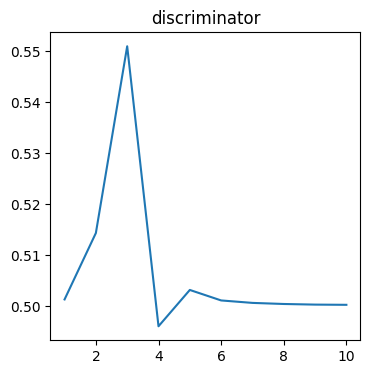

In [10]:
visualize_discriminator()

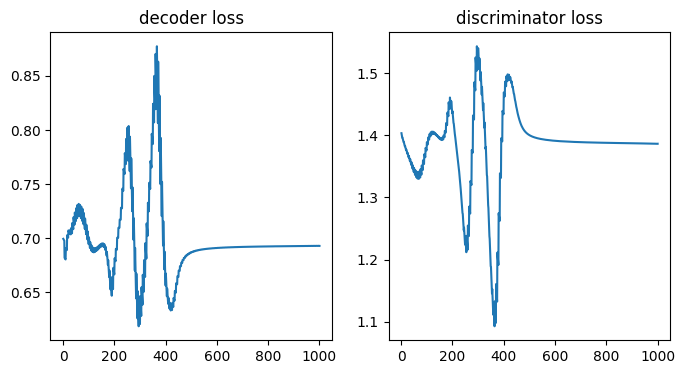

In [11]:
visualize_loss()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

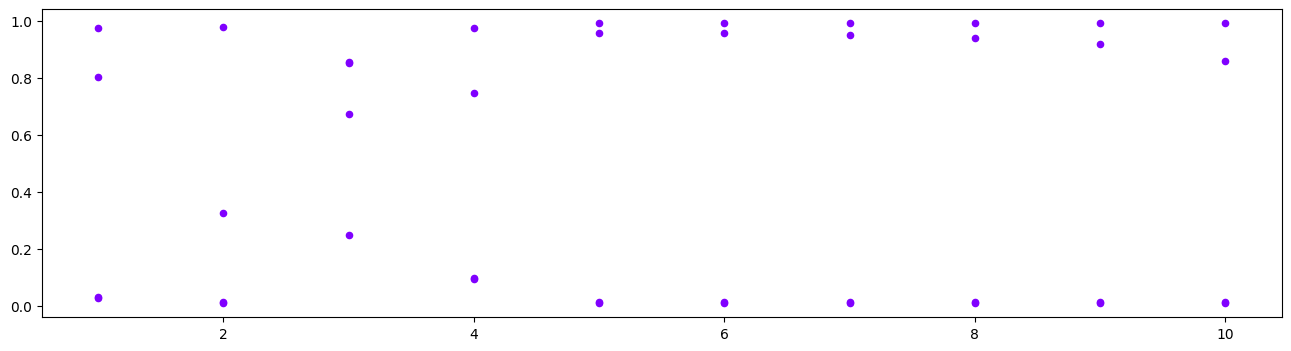

In [12]:
visualize_decoder(draw_num)

In [13]:
choice = np.random.choice(100,5)
choiced_x = x_data[choice]
print(choiced_x)
fake_data =decoder(choiced_x)
print(fake_data)
fake_pred =discriminator(fake_data)
print(fake_pred)


tensor([[-0.3500,  0.9373],
        [-0.1092, -0.0041],
        [ 0.8568, -2.2222],
        [ 0.3873, -0.6348],
        [-1.1175,  1.1086]])
tensor([[0.0083, 0.9936, 0.0120, 0.8725],
        [0.0075, 0.9940, 0.0111, 0.8738],
        [0.0073, 0.9939, 0.0107, 0.8689],
        [0.0081, 0.9937, 0.0116, 0.8700],
        [0.0065, 0.9944, 0.0104, 0.8796]], grad_fn=<SigmoidBackward0>)
tensor([[0.5002],
        [0.5001],
        [0.5002],
        [0.5002],
        [0.5001]], grad_fn=<SigmoidBackward0>)
